<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2021</h1>
<h2>Laboratori 5 - Enumeratius, Ramificació i Poda</h2>
</center>
</div>

In [1]:
import sys
sys.path.insert(0, '../../')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Backtracking

El <b>backtracking</b> és una tècnica d'exploració exhaustiva, és a dir, que explora tots els possibles estats d'un problema. La implementació d'un algorisme mitjançant backtracking no és gaire diferent a les estratègies de recursió que hem vist fins ara peró amb un matís important que veurem a continuació. Tots els algorismes de backtracking es caracteritzen per anar avançant fins que es pugui i, en cas d'arribar a un punt on no podem seguir explorant, <b>desfer el camí fins a l'últim punt possible</b> i explorar els següents estats.<br><br>
Un exemple per al problema de les N-Reines (N=4) el podeu veure representat en la figura següent.<br>
Observeu com inicialment es col·loca una reina a la primera casella (0,0) i, al no arribar a una solució, s'acaba movent a la posició (1,0).
<img src="https://i.imgur.com/FYu8t3s.gif" width='20%'/>


## Com programem algorismes usant backtracking?

Tot algorimse de backtracking ha de tenir, com a mínim, els següents tres blocs de codi.

<img src="img/backscheme.png" width='40%'/>

<ol>
    <li><b>Solució trobada</b>: Hem de tenir una forma de comprovar si hem arribat a una solució. En el cas que aquest sigui l'únic objectiu del problema, ja haurem acabat i simplement haurem de desfer les crides recursives.
    <li><b>Exploració</b>: Donat un estat actual, mirem quins moviments podem fer (si és que en podem fer algun!). Triem un dels moviments (seguint un criteri, o no) i cridem recursivament la funció esperant trobar una solució al problema. En el cas que el resultat d'una exploració no hagi retornat cap solució vàlida, hem de desfer el moviment que havíem fet.
    <li><b>Estat no vàlid</b>: En el cas que durant l'exploració ens trobem amb un estat que no es vàlid per seguir explorant, per exemple, no podem fer cap altre moviment i tampoc hem resolt el problema, avisem a les crides anteriors d'això per a que puguin desfer-lo.
</ol>

<div class="alert alert-success">
    <h1>Problema 1: Lights Out!</h1>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/LightsOutIllustration.svg" width='70%'>
    <p>
        Lights Out és un joc que consisteix en encendre o apagar totes les llums d'un tauler de dimensió $W\times H$ en el <b>mínim nombre de clics possibles</b>. L'objectiu d'aquest problema és una mica diferent. Donades dues configuracions de tauler (per exemple la primera i última imatge de la figura anterior), volem trobar el mínim nombre de clics que ens permeten transformar un tauler en l'altre.<br><br>
        Cada cel·la de la graella té dos estats possibles (encesa/apagada) i al fer clic sobre una cel·la es canvia l'estat d'ella mateixa i de les cel·les adjacents horitzontals i verticals com podeu veure representat també en la figura anterior.<br><br>
        Implementeu les dues funcions <b>compare_grids</b> i <b>solve_lights_out</b>. 
        <ol>
            <li>La funció <b>compare_grids</b> ha de retornar un valor de similitud entre dues graelles.
            <li>La funció <b>solve_lights_out</b> ha d'implementar estratègies de backtracking i/o ramificació i poda per tal d'optimitzar el màxim el temps d'execució. Podeu plantejar-vos també usar cues de prioritat per prioritzar l'expansió de certs estats en concret.
        </ol>        
    La classe <b>LightsOut</b> conté una sola variable, <b>grid</b> amb la representació de cada posició de la graella.<br>
    Té implementades les funcions <b>click, board_id, show_board</b> que s'expliquen a continuació.    
    </p>
    
</div>

In [2]:
from lights_out import LightsOut
import random
from matplotlib import pyplot as plt

### Generació de taulers aleatoris

In [3]:
# Generem dos configuracions aleatòries
W, H = 3,4
# W, H = 5,5
shuffle = 100

# Inicialitzem dos objectes amb la dimensió de la graella
a = LightsOut(W, H) # Configuració inicial
b = LightsOut(W, H) # Configuració objectiu

# Clicks aleatoris
for _ in range(shuffle):
    i, j = random.randint(0, len(b.grid)-1), random.randint(0, len(b.grid[0])-1)
    b = b.click(i,j)
    
for _ in range(shuffle):
    i, j = random.randint(0, len(a.grid)-1), random.randint(0, len(a.grid[0])-1)
    a = a.click(i,j)

### Mostrem els dos taulells generats

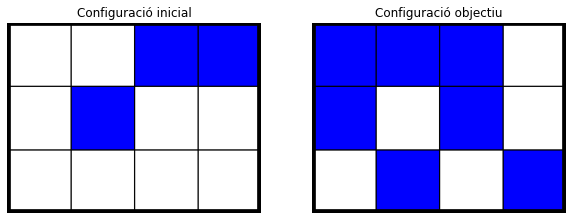

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

a.show_board(ax = axs[0])
axs[0].set_title('Configuració inicial')
b.show_board(ax = axs[1])
axs[1].set_title('Configuració objectiu')

plt.show()

### Ús de la variable 'grid' i de les funcions 'board_id()', 'click()' i 'show_board()'

In [5]:
# Podem accedir a a la graella amb la variable 'grid'
a.grid

[['-', '-', 'X', 'X'], ['-', 'X', '-', '-'], ['-', '-', '-', '-']]

In [6]:
# Podem usar un identificador únic de cada graella cridant a board_id()
a.board_id()

8047896864459289470

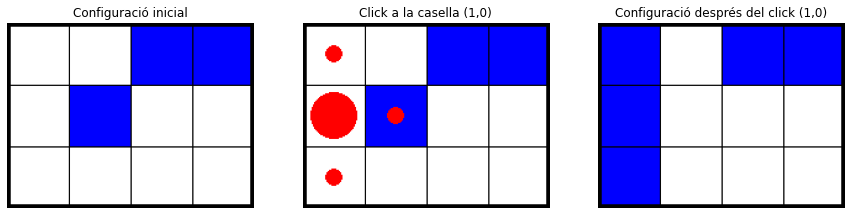

In [7]:
# Inicialitzem una figura amb tres subfigures i hi mostrem en primer lloc la configuració inicial
fig, axs = plt.subplots(1,3,figsize=(15,4))
a.show_board(ax = axs[0])
axs[0].set_title('Configuració inicial')

# Triem un punt aleatori i mostrem el click.
i, j = random.randint(0, len(a.grid)-1), random.randint(0, len(a.grid[0])-1)
a.show_board(ax = axs[1], show_click=(i,j))
axs[1].set_title(f'Click a la casella ({i},{j})')

# Executem el click i mirem el resultat
new_a = a.click(i,j)
new_a.show_board(ax = axs[2])
axs[2].set_title(f'Configuració després del click ({i},{j})')

plt.show()

In [8]:
def compare_grids(l1,l2,m,n):
    """
    Aquesta funció assigna una puntuació a la similitud entre l1 i l2.
    
    Params
    ======
    :l1, l2: Dos objectes de tipus LightsOut
    :m: height
    :n: width
    
    Returns
    =======
    :score: Una puntuació entre aquests dos elements.
    """
    # Declaració de variables
    score = 0;
    
    # Si les dues graelles tenen dimensions diferents, no fem el càlcul
    if len(l1.grid) != len(l2.grid) or len(l1.grid[0]) != len(l2.grid[0]):
        return -1
    
    # Cos del programa
    for i in range(m):
        for j in range(n):
            if l1.grid[i][j] == l2.grid[i][j]:
                score += 1
    return score

In [9]:
from queue import PriorityQueue
expanded = 0
best_expanded = 0
best_solution = set()

def valid_movement(i, j, ini, tar, best_moves):
    global best_solution
    if best_solution and len(best_moves) > len(best_solution):
        return False
    if ini.grid[i][j] != tar.grid[i][j] and (i,j) not in best_moves:
        return True
    
    return False
    
def backtracking(ini, tar, m, n, best_moves):
    # Declaració de variables global
    global expanded
    global best_expanded
    global best_solution
    
    # Augmentem expanded
    expanded += 1
    
    # Solució trobada
    if ini.grid == tar.grid:
        return True
    # recorrem l'array
    for i in range(m):
        for j in range(n):
            if(valid_movement(i,j,ini,tar,best_moves)):
                # emplacem el moviment
                best_moves.add((i,j))
                if(backtracking(ini.click(i,j),tar,m,n,best_moves)):
                    # posem la solució a la cua
                    if not best_solution or len(best_moves) < len(best_solution):
                        best_solution = best_moves.copy()

                best_moves.remove((i,j))
    return False

def solve_lights_out(ini, tar):
    """
    Aquesta funció soluciona el problema Lights Out i retorna una solució de moviments mínims.
    
    Params
    ======
    :ini, tar: Dos objectes de tipus LightsOut
    
    Returns
    =======
    :expanded: Número de taulers que s'han expandit
    :best_moves: La seqüència de moviments que s'han de realitzar per arribar d'un tauler a l'altre en el format [(0,0), (3,2), (1,2),...]
    """
    m, n = len(ini.grid), len(ini.grid[0])
    backtracking(ini,tar,m,n,set())
    
    return expanded, best_solution

def show_steps(ini, tar, steps):
    """
    Mostra una figura per pas donat un tauler inicial i un conjunt de passos
    
    Params
    ======
    :ini: Un objecte de la classe LightsOut amb la configuració original
    :tar: Un objecte de la classe LightsOut amb la configuració objectiu
    :steps: Una llista de passos amb el format [(0,0), (3,2), (1,2),...]
    """
    fig, axs = plt.subplots(1, len(steps)+2, figsize=(30,5))
    axs = axs.flatten()
    for i, step in enumerate(steps):
        ini.show_board(ax=axs[i], show_click=step)
        axs[i].set_title(f"Click at {step}")
        ini = ini.click(*step)
        ini.show_board(ax=axs[i+1])
        axs[i+1].set_title(f'Result after {len(steps)} steps')
        tar.show_board(ax=axs[i+2])
        axs[i+2].set_title(f'Target configuration')
    plt.show()

Proveu-ho aquí:

In [10]:
expanded, moves = solve_lights_out(a,b)

Expanded boards: 549376


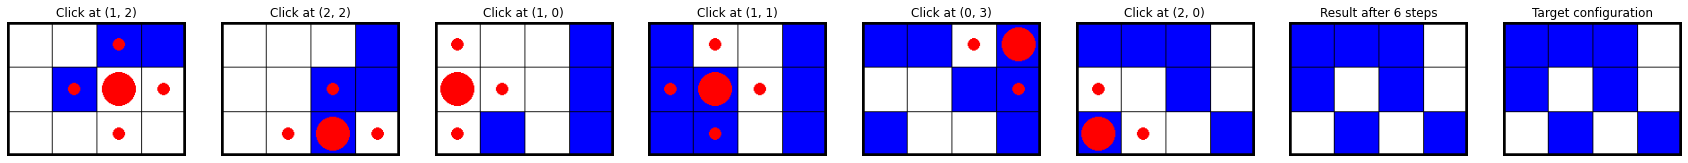

In [11]:
print('Expanded boards:',expanded)
show_steps(a,b,moves)

<div class="alert alert-success">
    <h1>Problema 2: Roomba!</h1>
    <p>
        En el nostre pis quadrat, tenim una roomba endollada a la seva base de càrrega. Volem que visiti un seguit de punts que hem embrutat i que ho faci en el menor temps possible. Si el nostre pis és de $W\times H$ cel·les i la roomba està situada inicialment a les coordenades $(x_0,y_0)$ volem trobar el menor nombre de passos possibles $p$ d'un recorregut que comenci i acabi a $(x_0,y_0)$ i que visiti tots els punts.<br><br>
        Implementeu la funció <b>solve_roomba</b> utilitzant estratègies de backtracking i ramificació i poda. Ha de retornar els taulers expandits i un camí que comenci i acabi a $(x_0,y_0)$ passant per tots els punts que es demanen. També heu d'implementar les funcions <b>inferior_bound</b> i <b>superior_bound</b> per a que retornin una cota inferior i superior, respectivament.
        <ol>
            <li><b>Cota inferior</b>: Considereu que tots els punts estan alinets horitzontalment amb la roomba. Quin seria el cost de visitar tots els punts en aquest cas?
            <li><b>Cota superior</b>: Trobeu una solució, no òptima evidentment, usant una estratègia greedy. Com a mínim ja tindrem una solució que, segurament, no serà la millor però la podrem fer servir per comparar durant l'execució del nostre algorisme.
        </ol>
        La classe <b>Roomba</b> conté quatre variables:
        <ol>
            <li><b>H, W</b>: amb les dimensions del pis.
            <li><b>origin</b>: una parella $(x_0,y_0)$ amb l'estació de càrrega de la roomba.
            <li><b>points</b>: una llista de parelles diferents entre elles $(i,j)$ amb els punts que s'han de netejar.
        </ol>
    </p>
    
</div>

In [12]:
from roomba import Roomba

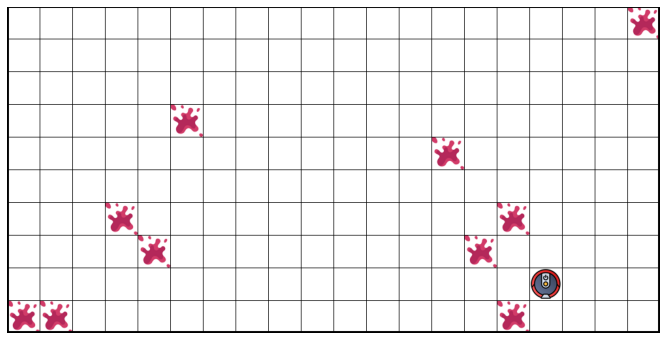

In [13]:
# Inicialitzem un tauler aleatori
H, W = 10,20
r = Roomba(H, W)
num_points = 10

points = random.sample([(i,j) for i in range(H) for j in range(W)], num_points)
origin = random.choice([(i,j) for i in range(H) for j in range(W)])
while origin in points:
    origin = random.choice([(i,j) for i in range(H) for j in range(W)])

# Afegim els punts a netejar i l'orígen
r.set_points(points)
r.set_origin(origin)

# Mostrem la graella
r.show_board()

## Distància de Manhattan
La distància de manhattan ens permet trobar la distància entre dos punts d'una graella. A diferència de la <b>distància euclidiana</b> (blava), la <b>distància de manhattan</b> (vermella) no contempla la distància en línia recta sinó que té en compte la morfologia de la grella. D'aquesta forma ens dóna una distància real entre dos punts d'una ciutat quadriculada o del taulell del problema que volem resoldre.

<img src='https://static.packt-cdn.com/products/9781787121515/graphics/bd978c4c-8251-489d-bcda-5ce7b7b825dd.png' width='20%'>

In [14]:
def manhattan_dist(point1, point2):
    """
    Donats dos punts point1, point2, retorna la distància de manhattan
    
    Params
    ======
    :point1, point2: Dos punts amb el format point1=(a1,b1), point2=(a2,b2)
    
    Returns
    =======
    :dist: La distància de manhattan entre els dos punts. dist = |a1-a2| + |b1-b2|
    
    """
    a1, b1 = point1
    a2, b2 = point2
    return abs(a1-a2)+abs(b1-b2)

In [15]:
def superior_bound(roomba):
    """
    Retorna la cota superior inicial per al problema de la Roomba usant una estratègia greedy.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba. Podeu accedir a les variables roomba.points, roomba.origin, roomba.W, roomba.H
    
    Returns
    =======
    :sup: La cota superior incial per a aquest problema. 
    """
    # Bàsicament busquem una solució qualsevol al problema
    # Guardem el punt previ
    sup = 0; prev = roomba.origin
    # Iterem sobre la llista
    for point in roomba.points+[roomba.origin]:
        sup += manhattan_dist(prev,point)
        prev = point
    return sup

def inferior_bound(roomba):
    """
    Retorna la cota inferior inicial per al problema de la Roomba. 
    Considereu que tots els punts estan alineats i calculeu-ne el cost de visitar-los tots i tornar a la base de càrrega.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba. Podeu accedir a les variables roomba.points, roomba.origin, roomba.W, roomba.H
    
    Returns
    =======
    :inf: La cota inferior incial per a aquest problema. 
    """
    # Quan els punts estan situats al voltant del punt de càrrega del Roomba
    # necessitem de n+2 moviments, ja que ha de sortir de la base de càrrega,
    # passar per tots els punts i tornar-hi.
    
    return len(roomba.points)+2

In [82]:
def solve_roomba(roomba):
    """
    Soluciona el problema de trobar el camí mínim en una graella 2-Dimensional passant per un seguit de punts.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba
    
    Returns
    =======
    :expanded: Número de taulers que s'han expandit
    :best_moves: La seqüència de moviments que ha de realitzar la roomba per visitar tots els punts amb el format [(0,0), (0,1), (0,2),...,(0,0)]
    """
    # Hem d'usar una estratègia de ramifiació i poda, ens basarem en el que hem treballat a classe de problemes
    sup_bound = superior_bound(roomba)
    inf_bound = inferior_bound(roomba)
    
    # DECLARACIÓ DE VARIABLES
    expanded = 0
    best_moves, best_bound = [], sup_bound
    # Els moviments fins al moment i el seu cost
    moves = [roomba.origin]
    cost = 0
    
    # Guardem en una cua de prioritat les dades que necessitem
    # Guardarem les variables:
    # 1. Els moviments fins al moment
    # 2. El cost en distància de Manhattan que suposen aquests moviments
    pq = PriorityQueue()
    pq.put((sup_bound, moves))
    
    # Iterem sobre la PriorityQueue
    while not pq.empty():
        
        # Obtenim un nou element de la cua
        curr_bound, curr_moves = pq.get()
        expanded += 1
        child = curr_moves[-1]

        # Mirem tots els moviments valids que podem fer des d'aquest tauler
        col = allowed_moves(child,set(curr_moves),roomba.points)
        
        # Els analitzem
        while not col.empty():
            distance, destination = col.get()
            new_bound = inf_bound + distance
            # Si és un estat solució i ens millora la cota, actualitzem.
            if len(curr_moves) == len(roomba.points)+1:
                if new_bound <= best_bound:
                    best_bound = new_bound
                    best_moves = curr_moves.copy()      
            # En cas de que no sigui solució però ens millori la cota. 
            elif (new_bound <= best_bound):
                new_moves = curr_moves.copy()
                new_moves.append(destination)
                pq.put((new_bound,new_moves))
                
    best_moves.append(roomba.origin)
    return expanded, best_moves

In [81]:
def allowed_moves(origin,moves,lst):
    allowed = PriorityQueue()
    for dirt in lst:
        if dirt not in moves:
            allowed.put((manhattan_dist(origin, dirt), dirt))
    return allowed

[(0, 0)]


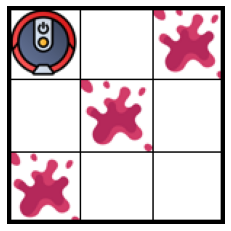

In [83]:
H, W = 3,3
r = Roomba(H, W)
r.set_origin((0,0))
r.set_points([(0,2),(1,1),(2,0)])
expanded, path = solve_roomba(r)
print(path)
r.show_board(path=path)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>30 de Desembre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b>. El notebook ha de tenir com a nom:
</p>
<p>
    <code>L5_Grup_Cognom_Nom.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>